# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print(x_train.shape)
print(y_train.shape)

(50000, 3072)
(50000, 10)


In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [13]:
results = {}
lr = LEARNING_RATE 
for opti in OPTIMIZER:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

50000/50000 [==============================] - 6s 127us/step - loss: 1.6747 - accuracy: 0.4175 - val_loss: 1.6800 - val_accuracy: 0.4175
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6711 - accuracy: 0.4192 - val_loss: 1.6793 - val_accuracy: 0.4170
Epoch 50/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6677 - accuracy: 0.4214 - val_loss: 1.6734 - val_accuracy: 0.4171
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 9s 179us/step - loss: 0.8308 - accuracy: 0.7015 - val_loss: 1.8561 - val_accuracy: 0.4780
Epoch 46/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.8206 - accuracy: 0.7072 - val_loss: 1.9231 - val_accuracy: 0.4715
Epoch 47/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.8091 - accuracy: 0.7103 - val_loss: 1.9596 - val_accuracy: 0.4842
Epoch 48/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.7949 - accuracy: 0.7159 - val_loss: 1.9445 - val_accuracy: 0.4841
Epoch 49/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.7889 - accuracy: 0.7169 - val_loss: 1.9460 - val_accuracy: 0.4847
Epoch 50/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.7731 - accuracy: 0.7237 - val_loss: 2.0658 - val_accuracy: 0.4503
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
______________________

50000/50000 [==============================] - 8s 164us/step - loss: 1.2909 - accuracy: 0.5515 - val_loss: 1.3966 - val_accuracy: 0.5041
Epoch 43/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.2868 - accuracy: 0.5521 - val_loss: 1.3950 - val_accuracy: 0.5071
Epoch 44/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2825 - accuracy: 0.5549 - val_loss: 1.3903 - val_accuracy: 0.5040
Epoch 45/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.2780 - accuracy: 0.5560 - val_loss: 1.3920 - val_accuracy: 0.5075
Epoch 46/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2735 - accuracy: 0.5580 - val_loss: 1.3871 - val_accuracy: 0.5128
Epoch 47/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.2698 - accuracy: 0.5580 - val_loss: 1.3834 - val_accuracy: 0.5112
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2658 - accuracy: 0.5616 - val_loss:

50000/50000 [==============================] - 10s 194us/step - loss: 0.8352 - accuracy: 0.7008 - val_loss: 1.5139 - val_accuracy: 0.5188
Epoch 39/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.8241 - accuracy: 0.7053 - val_loss: 1.5381 - val_accuracy: 0.5203
Epoch 40/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.8196 - accuracy: 0.7091 - val_loss: 1.5307 - val_accuracy: 0.5232
Epoch 41/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.7946 - accuracy: 0.7163 - val_loss: 1.5844 - val_accuracy: 0.5189
Epoch 42/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.7935 - accuracy: 0.7156 - val_loss: 1.6103 - val_accuracy: 0.5203
Epoch 43/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.7769 - accuracy: 0.7242 - val_loss: 1.5827 - val_accuracy: 0.5282
Epoch 44/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.7476 - accuracy: 0.7328 - va

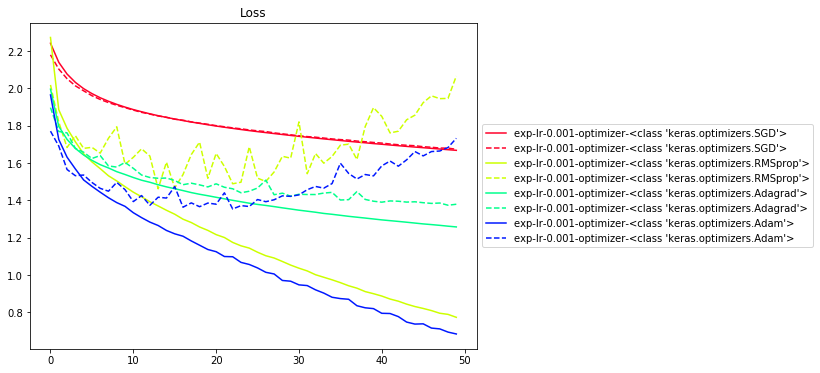

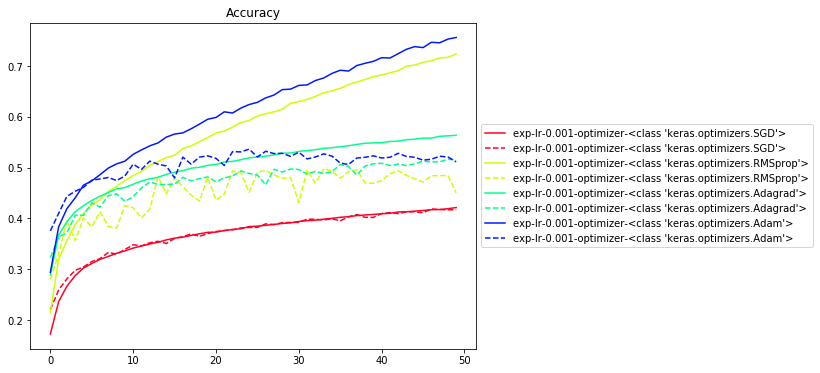

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()